In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from imblearn.over_sampling import SMOTENC

In [25]:
df = pd.read_csv("../cleaned_hate_crime.csv")

In [26]:
df.head()

,region_name,offender_race,grouped_total_offender_count,grouped_victim_count,generalized_offense_name,generalized_location_name,generalized_bias_desc
0,Midwest,White,Few,Few,violent crimes,Residence,race
1,Northeast,White,Few,Few,violent crimes,Miscellaneous,race
2,Northeast,White,Few,Few,violent crimes,Miscellaneous,race
3,South,Black or African American,Several,Few,violent crimes,Public Place,race
4,Northeast,Black or African American,Few,Few,violent crimes,Miscellaneous,race


In [27]:
# Creating X and Y General Subsets of the data
X_gen = df[["region_name", "offender_race", "grouped_total_offender_count", "grouped_victim_count", "generalized_offense_name", "generalized_location_name"]]

Y_gen = df["generalized_bias_desc"]

# Logistic Regression

In [28]:
# Passing a copy of X_gen and Y_gen to X_logit and Y_logit
X_logit = X_gen
Y_logit = Y_gen

In [29]:
Y_logit.info()

<class 'pandas.core.series.Series'>
RangeIndex: 132989 entries, 0 to 132988
Series name: generalized_bias_desc
Non-Null Count   Dtype 
--------------   ----- 
132989 non-null  object
dtypes: object(1)
memory usage: 1.0+ MB


In [30]:
Y_logit.info()

<class 'pandas.core.series.Series'>
RangeIndex: 132989 entries, 0 to 132988
Series name: generalized_bias_desc
Non-Null Count   Dtype 
--------------   ----- 
132989 non-null  object
dtypes: object(1)
memory usage: 1.0+ MB


- 0: Race
- 1: Religion
- 2: Sexual Orientation

<Axes: xlabel='generalized_bias_desc', ylabel='count'>

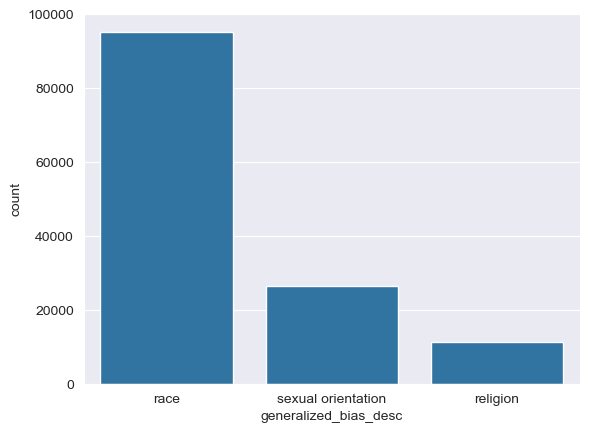

In [31]:
order = Y_logit.value_counts().index

sns.countplot(x=Y_logit, order=order)

In [32]:
cat_vars=["region_name", "offender_race", "grouped_total_offender_count", "grouped_victim_count", "generalized_offense_name", "generalized_location_name"]

for var in cat_vars:
    cat_list = pd.get_dummies(X_logit[var], prefix=var)
    X_logit = pd.concat([X_logit, cat_list], axis=1)
    X_logit.drop(var, axis=1, inplace=True)

In [33]:
Y_cat_list = pd.get_dummies(Y_logit, prefix="generalized_bias_desc")
Y_logit = pd.concat([Y_logit, Y_cat_list], axis=1)
Y_logit.drop("generalized_bias_desc", axis=1, inplace=True)

In [34]:
X_logit

,region_name_Midwest,region_name_Northeast,region_name_Other,region_name_South,region_name_U.S. Territories,region_name_West,offender_race_American Indian or Alaska Native,offender_race_Asian,offender_race_Black or African American,offender_race_Multiple,...,generalized_offense_name_sexual crimes,generalized_offense_name_violent crimes,generalized_location_name_Construction/Industrial,generalized_location_name_Education,generalized_location_name_Law Enforcement,generalized_location_name_Miscellaneous,generalized_location_name_Outdoor/Nature,generalized_location_name_Public Place,generalized_location_name_Residence,generalized_location_name_Retail
0,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
3,False,False,False,True,False,False,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
4,False,True,False,False,False,False,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132984,False,False,False,True,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
132985,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
132986,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
132987,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [35]:
Y_logit

,generalized_bias_desc_race,generalized_bias_desc_religion,generalized_bias_desc_sexual orientation
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
132984,False,False,True
132985,False,False,True
132986,True,False,False
132987,True,False,False


## Applying SMOTENC

In [36]:
# Split the data into train and test sets
X_train_logit, X_test_logit, Y_train_logit, Y_test_logit = train_test_split(X_logit, Y_logit, test_size=0.2, random_state=69)

In [37]:
X_train_logit = np.array(X_train_logit)
Y_train_logit = np.array(Y_train_logit)

X_test_logit = np.array(X_test_logit)
Y_test_logit = np.array(Y_test_logit)

In [38]:
cat_indices = [0, 1, 2]

# Apply SMOTENC directly
smote_nc = SMOTENC(categorical_features=cat_indices, random_state=69)

X_train_resampled, Y_train_resampled = smote_nc.fit_resample(X_train_logit, Y_train_logit)

C:\Users\Shane\AppData\Local\Temp\ipykernel_19256\3596560476.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


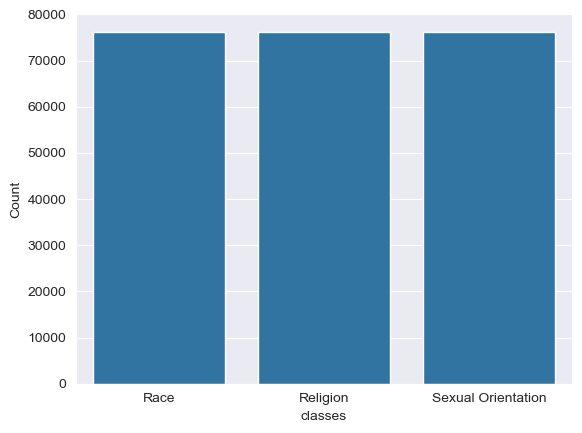

In [40]:
# Flatten the resampled target labels array
Y_train_resampled_flat = Y_train_resampled.argmax(axis=1)

# Convert the flattened array to a pandas Series
Y_train_resampled_series = pd.Series(Y_train_resampled_flat)

new_labels = ["Race", "Religion", "Sexual Orientation"]

# Plot the distribution
ax = sns.countplot(x=Y_train_resampled_series)

ax.set_xticklabels(new_labels)

plt.xlabel("classes")
plt.ylabel("Count")
plt.show()

In [18]:
model = LogisticRegression(multi_class="multinomial", solver='lbfgs', max_iter=1000)

model.fit(X_train_resampled, Y_train_resampled_flat)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [19]:
Y_test_logit_flat = Y_test_logit.argmax(axis=1)
Y_pred_logit = model.predict(X_test_logit)

accuracy = accuracy_score(Y_test_logit_flat,Y_pred_logit)
print("Accuracy:", accuracy)

Accuracy: 0.38690879013459656


In [20]:
confusion_matrix = confusion_matrix(Y_test_logit_flat, Y_pred_logit)
print(confusion_matrix)

[[6277 4966 7761]
 [ 486 1179  645]
 [1311 1138 2835]]


In [21]:
print(classification_report(Y_test_logit_flat, Y_pred_logit))

              precision    recall  f1-score   support

           0       0.78      0.33      0.46     19004
           1       0.16      0.51      0.25      2310
           2       0.25      0.54      0.34      5284

    accuracy                           0.39     26598
   macro avg       0.40      0.46      0.35     26598
weighted avg       0.62      0.39      0.42     26598



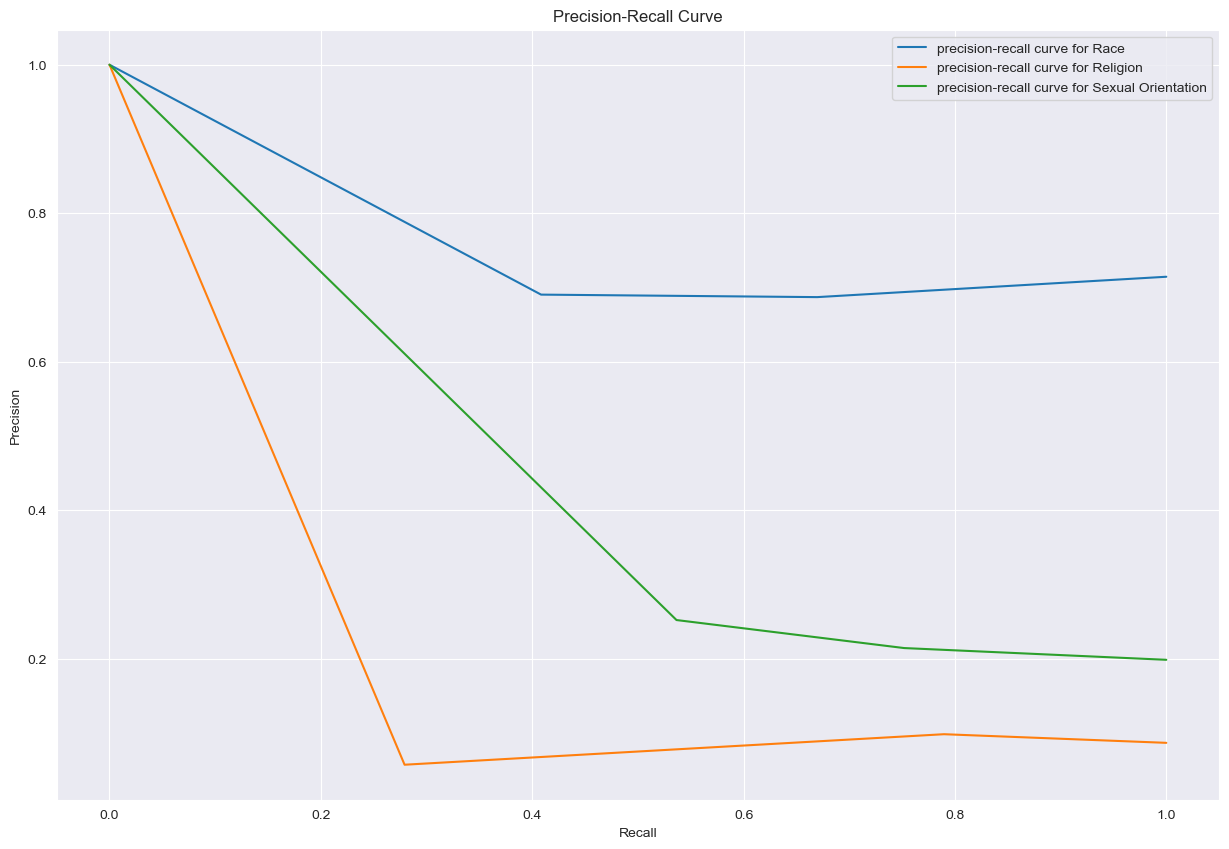

In [22]:
from sklearn.metrics import precision_recall_curve

precision = dict()
recall = dict()

precision0, recall0, _ = precision_recall_curve(Y_test_logit_flat, Y_pred_logit, pos_label=0)
precision1, recall1, _ = precision_recall_curve(Y_test_logit_flat, Y_pred_logit, pos_label=1)
precision2, recall2, _ = precision_recall_curve(Y_test_logit_flat, Y_pred_logit, pos_label=2)

# change plot size
plt.figure(figsize=(15, 10))
plt.plot(recall0, precision0, label='precision-recall curve for Race')
plt.plot(recall1, precision1, label='precision-recall curve for Religion')
plt.plot(recall2, precision2, label='precision-recall curve for Sexual Orientation')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.show()